# LabelSmoothing

In [ ]:
#hide
!fusermount -u drive
!google-drive-ocamlfuse drive
from google.colab import drive
drive.mount('/content/drive')

/bin/bash: google-drive-ocamlfuse: command not found
Mounted at /content/drive


In [ ]:
#!pip install torch
#!pip install pytorch
#!pip install torchvision
#!pip install fastai
!pip3 install git+https://github.com/fastai/fastai.git 
!pip install -Uqq fastbook

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-wor6o64m
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-wor6o64m
  Created wheel for fastai: filename=fastai-2.3.1-cp37-none-any.whl size=192507 sha256=1a0978164bd115dc5983f99acfba62fa07b7f5d83395d5e23141222646a62328
  Stored in directory: /tmp/pip-ephem-wheel-cache-abr5j5xb/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai


In [ ]:
#hide
import PIL
from PIL import Image 
import os
import requests
import torch
import pandas as pd
import fastbook
from fastai.vision.widgets import *
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
#hide
import requests
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
#path = Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed')
rootPath = glob.glob(os.path.join(os.getcwd(), "gdrive/MyDrive/**/AI_reCaptcha v2/"), recursive=true)[0]
path = os.path.join(rootPath, "recaptcha-dataset-main/trimmed/")
path

In [ ]:
fns = get_image_files(path)
fns

(#223) [Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (9).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (20).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (10).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (16).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (15).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (6).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (2).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/

In [ ]:
def get_y(r): return L(parent_label(r))
#Vi prøvede først at lave vores egen måde at loade filer ind for at begrænse datasettet
# def get_image_files_by_size(path, sample_size = 200): 
#   return list(get_image_files(path))[:sample_size]

In [ ]:
dblock = DataBlock(
    blocks = (ImageBlock(), CategoryBlock()), 
    get_items = get_image_files, 
    get_y = parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(path, bs=64)

In [ ]:
#dls.valid.show_batch(max_n=200, nrows=10)
dls.c??

In [ ]:
#model = xresnet50(True, n_out=dls.c)
model = resnet50
learn = cnn_learner(dls, 
                    model, 
                    metrics=accuracy, 
                    cbs=MixUp, 
                    loss_func=LabelSmoothingCrossEntropy())

Minimum/10: 5.75e-07, steepest point: 1.58e-04


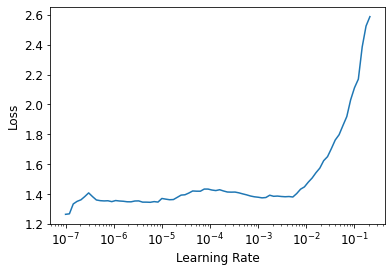

In [ ]:
lr_min,lr_steep = learn.lr_find()
lr_min
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(40, base_lr=5.75e-07)

epoch,train_loss,valid_loss,accuracy,time
0,3.875205,3.655696,0.068182,00:01


epoch,train_loss,valid_loss,accuracy,time
0,3.919041,3.373291,0.045455,00:01
1,3.827166,3.227578,0.045455,00:01
2,3.909230,3.130134,0.022727,00:01
3,3.927115,3.078517,0.022727,00:01
4,3.958529,3.034851,0.045455,00:01
5,3.910722,2.996451,0.022727,00:01
6,3.910551,3.014104,0.136364,00:01
7,3.933049,3.017250,0.113636,00:01
8,3.930960,3.014568,0.090909,00:01
9,3.910522,3.019479,0.090909,00:01


In [ ]:
#learn.fit_one_cycle(8.32e-03)

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
img = PILImage.create(btn_upload.data[-1])
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn.predict(img )

#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]}'
lbl_pred

In [ ]:
learn.dls.vocab

In [ ]:
probs

In [ ]:
pred_idx